In [66]:
# work on combined dataset

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline



In [67]:
accepted_df = pd.read_csv('combined.csv')



/Users/deveshkandpal/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
accepted_df.shape



(1646801, 151)

In [69]:
accepted_df = accepted_df.dropna(axis=1, thresh=0.30 * accepted_df.shape[0])
accepted_df = accepted_df.dropna(axis=0, thresh = 0.30 * (accepted_df.shape[1]))
accepted_df.shape


(1646778, 110)

In [70]:
accepted_df = accepted_df[accepted_df['fico_range_low'] > 660]

accepted_df.shape


(1497304, 110)

In [71]:
accepted_df.grade.unique()


array(['B', 'C', 'A', 'F', 'D', 'E', 'G'], dtype=object)

In [72]:
accepted_df['int_rate'] = accepted_df['int_rate'].map(lambda x : x.replace('%', ''))
accepted_df['int_rate'] = accepted_df['int_rate'].map(float)


In [73]:

grade_interest = accepted_df[['grade', 'int_rate']]
grade_interest_mean = grade_interest.groupby(by='grade').mean().reset_index()



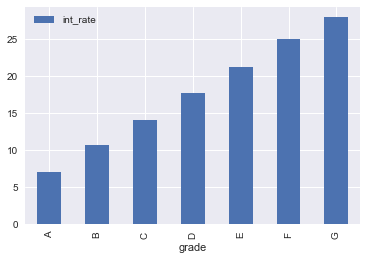

In [74]:
grade_interest_mean.plot(kind='bar', x='grade', y='int_rate')



In [75]:
#subgrade -> fico score, loan amnt, number of open accounts, loan term, purpose, state, debt_settlement_flag, dti



In [76]:
accepted_df['risk_score'] = (accepted_df['fico_range_low'] + accepted_df['fico_range_high']) / 2



In [77]:
accepted_df['term'].unique()



array([' 36 months', ' 60 months'], dtype=object)

In [78]:
# dti - elimination dti - debt / income , sub_grade
accepted_df_subset = accepted_df[['risk_score', 'loan_amnt', 'term', 'purpose', 'addr_state', 'debt_settlement_flag', 'dti', 'annual_inc', 'sub_grade', 'int_rate']]



In [79]:
accepted_df_subset.shape



(1497304, 10)

In [92]:
accepted_df = accepted_df[accepted_df['risk_score'].notnull() & accepted_df['loan_amnt'].notnull() & accepted_df['term'].notnull() & accepted_df['purpose'].notnull() & accepted_df['addr_state'].notnull() & accepted_df['debt_settlement_flag'].notnull() & accepted_df['dti'].notnull() & accepted_df['annual_inc'].notnull() & accepted_df['sub_grade'].notnull() & accepted_df['int_rate'].notnull()]
accepted_df['term'] = accepted_df['term'].map({' 36 months': 36, ' 60 months' : 60})
accepted_df.shape

(1459356, 111)

In [93]:
accepted_df = accepted_df[accepted_df['risk_score'] > 660]
accepted_df = accepted_df[accepted_df['dti'] <= 35]
accepted_df_clustering = accepted_df[accepted_df['addr_state'] != 'IA']
accepted_df_clustering = accepted_df[accepted_df['addr_state'] != 'WV']
accepted_df_clustering_final = accepted_df_clustering[['risk_score', 'loan_amnt', 'term', 'purpose', 'addr_state', 'debt_settlement_flag', 'dti', 'annual_inc', 'sub_grade', 'int_rate']]
accepted_df_clustering_final.shape


(1454805, 10)

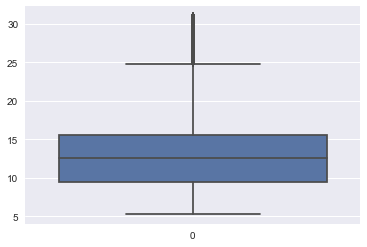

In [97]:
sns.boxplot(data=accepted_df_clustering_final['int_rate'])



In [99]:
accepted_df = accepted_df[accepted_df['int_rate'] <=25]
accepted_df_clustering_final = accepted_df_clustering_final[accepted_df_clustering_final['int_rate'] <=25]



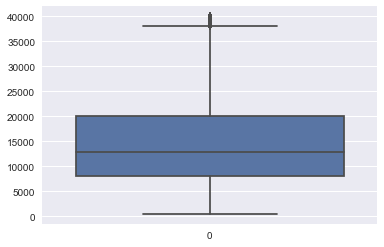

In [100]:
sns.boxplot(data=accepted_df_clustering_final['loan_amnt'])



In [101]:
accepted_df = accepted_df[accepted_df['loan_amnt'] <= 38000]
accepted_df_clustering_final = accepted_df_clustering_final[accepted_df_clustering_final['loan_amnt'] <=38000]



In [106]:
accepted_df_clustering_final.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420250 entries, 0 to 1646794
Data columns (total 10 columns):
risk_score              1420250 non-null float64
loan_amnt               1420250 non-null float64
term                    1420250 non-null int64
purpose                 1420250 non-null object
addr_state              1420250 non-null object
debt_settlement_flag    1420250 non-null object
dti                     1420250 non-null float64
annual_inc              1420250 non-null float64
sub_grade               1420250 non-null object
int_rate                1420250 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 119.2+ MB


In [103]:
accepted_df_clustering_final.columns



Index(['risk_score', 'loan_amnt', 'term', 'purpose', 'addr_state',
       'debt_settlement_flag', 'dti', 'annual_inc', 'sub_grade', 'int_rate'],
      dtype='object')

In [173]:
accepted_df_clustering_final_training = accepted_df_clustering_final.drop(['int_rate', 'risk_score'], axis=1)
accepted_df_clustering_final_training.shape



(1420250, 8)

In [174]:
purpose_dummies = pd.get_dummies(accepted_df_clustering_final_training['purpose'])
#addr_dummies = pd.get_dummies(accepted_df_clustering_final_training['addr_state'])
#debt_settlement_flag_dummies = pd.get_dummies(accepted_df_clustering_final_training['debt_settlement_flag'])
sub_grade_dummies = pd.get_dummies(accepted_df_clustering_final_training['sub_grade'])

accepted_clustering_with_dummies = accepted_df_clustering_final_training.join(purpose_dummies)
#accepted_clustering_with_dummies = accepted_clustering_with_dummies.join(addr_dummies)
#accepted_clustering_with_dummies = accepted_clustering_with_dummies.join(debt_settlement_flag_dummies)
accepted_clustering_with_dummies = accepted_clustering_with_dummies.join(sub_grade_dummies)



accepted_clustering_with_dummies.drop('purpose', 1, inplace=True)
accepted_clustering_with_dummies.drop('addr_state', 1, inplace=True)
accepted_clustering_with_dummies.drop('debt_settlement_flag', 1, inplace=True)
accepted_clustering_with_dummies.drop('sub_grade', 1, inplace=True)

# accepted_df_clustering_final_training.drop('purpose', 1, inplace=True)
# accepted_df_clustering_final_training.drop('addr_state', 1, inplace=True)
# accepted_df_clustering_final_training.drop('debt_settlement_flag', 1, inplace=True)
# accepted_df_clustering_final_training.drop('sub_grade', 1, inplace=True)
#accepted_df_clustering_final_training.drop('loan_amnt', 1, inplace=True)


accepted_clustering_with_dummies.shape



(1420250, 53)

In [130]:
accepted_clustering_with_dummies.drop('Y', 1, inplace=True)
accepted_clustering_with_dummies.shape



(1420250, 54)

In [175]:
from sklearn import preprocessing
normalized_data = preprocessing.normalize(accepted_clustering_with_dummies)




array([[  2.03953904e-01,   1.46846811e-03,   1.12786509e-03,
          9.78978742e-01],
       [  8.30453149e-02,   1.99308756e-03,   3.32181259e-05,
          9.96543778e-01],
       [  1.92232125e-01,   2.88348188e-03,   6.98443388e-04,
          9.81344999e-01],
       ..., 
       [  1.05469046e-01,   5.42412239e-04,   3.67634962e-05,
          9.94422438e-01],
       [  3.86137754e-01,   1.28712585e-03,   2.70725470e-04,
          9.22440190e-01],
       [  1.48340341e-01,   8.90042045e-04,   8.47765048e-04,
          9.88935606e-01]])

In [185]:
from sklearn.cluster import KMeans
clusters = [4,6,8,10, 12]
def cluster_data(k, dataset) :
    kmeans = KMeans(n_clusters=k, random_state=0, verbose=1)
    kmeans.fit(dataset)
    return kmeans.inertia_
    

inertia_values  = [cluster_data(el, normalized_data) for el in clusters]
inertia_values





Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1610.67890563
start iteration
done sorting
end inner loop
Iteration 1, inertia 1577.78059071
start iteration
done sorting
end inner loop
Iteration 2, inertia 1565.91798214
start iteration
done sorting
end inner loop
Iteration 3, inertia 1563.43446702
start iteration
done sorting
end inner loop
Iteration 4, inertia 1563.05426198
start iteration
done sorting
end inner loop
Iteration 5, inertia 1562.96964592
start iteration
done sorting
end inner loop
Iteration 6, inertia 1562.96015286
center shift 1.083156e-04 within tolerance 2.136698e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1593.44315901
start iteration
done sorting
end inner loop
Iteration 1, inertia 1580.76368259
start iteration
done sorting
end inner loop
Iteration 2, inertia 1575.42684034
start iteration
done sorting
end inner loop
Iteration 3, inertia 1571.47741232
start iteration
done sortin

Iteration 10, inertia 1583.70369736
start iteration
done sorting
end inner loop
Iteration 11, inertia 1581.81563607
start iteration
done sorting
end inner loop
Iteration 12, inertia 1579.04049984
start iteration
done sorting
end inner loop
Iteration 13, inertia 1576.36901829
start iteration
done sorting
end inner loop
Iteration 14, inertia 1572.39263488
start iteration
done sorting
end inner loop
Iteration 15, inertia 1569.54917392
start iteration
done sorting
end inner loop
Iteration 16, inertia 1568.30363768
start iteration
done sorting
end inner loop
Iteration 17, inertia 1567.8524185
start iteration
done sorting
end inner loop
Iteration 18, inertia 1567.78040255
start iteration
done sorting
end inner loop
Iteration 19, inertia 1567.52877822
start iteration
done sorting
end inner loop
Iteration 20, inertia 1566.21407667
start iteration
done sorting
end inner loop
Iteration 21, inertia 1565.55979668
start iteration
done sorting
end inner loop
Iteration 22, inertia 1565.40270169
start

Iteration 10, inertia 1578.09547107
start iteration
done sorting
end inner loop
Iteration 11, inertia 1577.36915127
start iteration
done sorting
end inner loop
Iteration 12, inertia 1577.11691721
start iteration
done sorting
end inner loop
Iteration 13, inertia 1576.99335285
start iteration
done sorting
end inner loop
Iteration 14, inertia 1576.95653714
start iteration
done sorting
end inner loop
Iteration 15, inertia 1576.94731901
start iteration
done sorting
end inner loop
Iteration 16, inertia 1576.94634358
center shift 3.079371e-05 within tolerance 2.136698e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 812.657391454
start iteration
done sorting
end inner loop
Iteration 1, inertia 802.843232513
start iteration
done sorting
end inner loop
Iteration 2, inertia 798.82764302
start iteration
done sorting
end inner loop
Iteration 3, inertia 797.472748231
start iteration
done sorting
end inner loop
Iteration 4, inertia 796.719028733
start iter

Iteration 16, inertia 809.103024569
start iteration
done sorting
end inner loop
Iteration 17, inertia 807.284054732
start iteration
done sorting
end inner loop
Iteration 18, inertia 805.489828982
start iteration
done sorting
end inner loop
Iteration 19, inertia 803.605257565
start iteration
done sorting
end inner loop
Iteration 20, inertia 802.533780012
start iteration
done sorting
end inner loop
Iteration 21, inertia 802.098409157
start iteration
done sorting
end inner loop
Iteration 22, inertia 801.79647361
start iteration
done sorting
end inner loop
Iteration 23, inertia 801.697110521
start iteration
done sorting
end inner loop
Iteration 24, inertia 801.635678686
start iteration
done sorting
end inner loop
Iteration 25, inertia 801.614480764
start iteration
done sorting
end inner loop
Iteration 26, inertia 801.597745001
start iteration
done sorting
end inner loop
Iteration 27, inertia 801.594859993
center shift 9.422970e-05 within tolerance 2.136698e-08
Initialization complete
start

Iteration 25, inertia 907.958701318
start iteration
done sorting
end inner loop
Iteration 26, inertia 906.935187565
start iteration
done sorting
end inner loop
Iteration 27, inertia 906.085268602
start iteration
done sorting
end inner loop
Iteration 28, inertia 905.152442994
start iteration
done sorting
end inner loop
Iteration 29, inertia 904.751674215
start iteration
done sorting
end inner loop
Iteration 30, inertia 904.599592149
start iteration
done sorting
end inner loop
Iteration 31, inertia 904.535429531
start iteration
done sorting
end inner loop
Iteration 32, inertia 904.515325861
start iteration
done sorting
end inner loop
Iteration 33, inertia 904.509956523
center shift 1.208545e-04 within tolerance 2.136698e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 631.62991835
start iteration
done sorting
end inner loop
Iteration 1, inertia 610.205693489
start iteration
done sorting
end inner loop
Iteration 2, inertia 580.352367834
start it

Iteration 8, inertia 494.384347152
start iteration
done sorting
end inner loop
Iteration 9, inertia 494.38368491
center shift 7.378956e-05 within tolerance 2.136698e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 568.559099379
start iteration
done sorting
end inner loop
Iteration 1, inertia 533.566119489
start iteration
done sorting
end inner loop
Iteration 2, inertia 519.396603993
start iteration
done sorting
end inner loop
Iteration 3, inertia 512.56644776
start iteration
done sorting
end inner loop
Iteration 4, inertia 509.70056777
start iteration
done sorting
end inner loop
Iteration 5, inertia 503.474243545
start iteration
done sorting
end inner loop
Iteration 6, inertia 500.633480369
start iteration
done sorting
end inner loop
Iteration 7, inertia 498.451963816
start iteration
done sorting
end inner loop
Iteration 8, inertia 497.715004779
start iteration
done sorting
end inner loop
Iteration 9, inertia 497.394314002
start iteration
don

Iteration 8, inertia 328.818674375
start iteration
done sorting
end inner loop
Iteration 9, inertia 328.12102022
start iteration
done sorting
end inner loop
Iteration 10, inertia 327.732752535
start iteration
done sorting
end inner loop
Iteration 11, inertia 327.635309518
start iteration
done sorting
end inner loop
Iteration 12, inertia 327.262605146
start iteration
done sorting
end inner loop
Iteration 13, inertia 326.951409227
start iteration
done sorting
end inner loop
Iteration 14, inertia 326.75334909
start iteration
done sorting
end inner loop
Iteration 15, inertia 326.541590547
start iteration
done sorting
end inner loop
Iteration 16, inertia 325.858013897
start iteration
done sorting
end inner loop
Iteration 17, inertia 325.309928896
start iteration
done sorting
end inner loop
Iteration 18, inertia 325.032822395
start iteration
done sorting
end inner loop
Iteration 19, inertia 324.886499005
start iteration
done sorting
end inner loop
Iteration 20, inertia 324.813745631
start it

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 370.717027544
start iteration
done sorting
end inner loop
Iteration 1, inertia 348.356506222
start iteration
done sorting
end inner loop
Iteration 2, inertia 341.664432203
start iteration
done sorting
end inner loop
Iteration 3, inertia 338.149731639
start iteration
done sorting
end inner loop
Iteration 4, inertia 335.659937621
start iteration
done sorting
end inner loop
Iteration 5, inertia 334.496745479
start iteration
done sorting
end inner loop
Iteration 6, inertia 333.832094183
start iteration
done sorting
end inner loop
Iteration 7, inertia 333.200503779
start iteration
done sorting
end inner loop
Iteration 8, inertia 332.820834029
start iteration
done sorting
end inner loop
Iteration 9, inertia 332.71041233
start iteration
done sorting
end inner loop
Iteration 10, inertia 332.537277474
start iteration
done sorting
end inner loop
Iteration 11, inertia 330.961418679
start iteration
done sortin

Iteration 16, inertia 330.233060241
start iteration
done sorting
end inner loop
Iteration 17, inertia 329.441506337
start iteration
done sorting
end inner loop
Iteration 18, inertia 328.653822059
start iteration
done sorting
end inner loop
Iteration 19, inertia 327.983950153
start iteration
done sorting
end inner loop
Iteration 20, inertia 327.650594539
start iteration
done sorting
end inner loop
Iteration 21, inertia 327.421431985
start iteration
done sorting
end inner loop
Iteration 22, inertia 327.116035367
start iteration
done sorting
end inner loop
Iteration 23, inertia 326.708587987
start iteration
done sorting
end inner loop
Iteration 24, inertia 325.947900568
start iteration
done sorting
end inner loop
Iteration 25, inertia 325.584366384
start iteration
done sorting
end inner loop
Iteration 26, inertia 325.245988334
start iteration
done sorting
end inner loop
Iteration 27, inertia 324.998229183
start iteration
done sorting
end inner loop
Iteration 28, inertia 324.872022917
star

Iteration 9, inertia 233.222865085
start iteration
done sorting
end inner loop
Iteration 10, inertia 233.16525354
start iteration
done sorting
end inner loop
Iteration 11, inertia 233.152893732
start iteration
done sorting
end inner loop
Iteration 12, inertia 233.149889946
center shift 1.194780e-04 within tolerance 2.136698e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 273.587484164
start iteration
done sorting
end inner loop
Iteration 1, inertia 260.50786256
start iteration
done sorting
end inner loop
Iteration 2, inertia 253.917944519
start iteration
done sorting
end inner loop
Iteration 3, inertia 247.189199493
start iteration
done sorting
end inner loop
Iteration 4, inertia 242.959139058
start iteration
done sorting
end inner loop
Iteration 5, inertia 241.110244459
start iteration
done sorting
end inner loop
Iteration 6, inertia 239.751171869
start iteration
done sorting
end inner loop
Iteration 7, inertia 238.440664052
start iteration

Iteration 18, inertia 231.493419986
start iteration
done sorting
end inner loop
Iteration 19, inertia 231.313894665
start iteration
done sorting
end inner loop
Iteration 20, inertia 231.213663319
start iteration
done sorting
end inner loop
Iteration 21, inertia 231.129298298
start iteration
done sorting
end inner loop
Iteration 22, inertia 231.064746332
start iteration
done sorting
end inner loop
Iteration 23, inertia 231.032992436
start iteration
done sorting
end inner loop
Iteration 24, inertia 231.011560904
start iteration
done sorting
end inner loop
Iteration 25, inertia 231.002960964
start iteration
done sorting
end inner loop
Iteration 26, inertia 231.000696451
center shift 1.439625e-04 within tolerance 2.136698e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 255.068440019
start iteration
done sorting
end inner loop
Iteration 1, inertia 243.164573963
start iteration
done sorting
end inner loop
Iteration 2, inertia 239.315053511
start i

[1562.9592690778054,
 796.2288007604069,
 493.14784279571677,
 322.26291362481561,
 231.0004866992987]

In [188]:
elbow_curve = pd.DataFrame()
elbow_curve['k'] = clusters
elbow_curve['inertia'] = inertia_values



In [189]:
elbow_curve.head()


,k,inertia
0,4,1562.959269
1,6,796.228801
2,8,493.147843
3,10,322.262914
4,12,231.000487


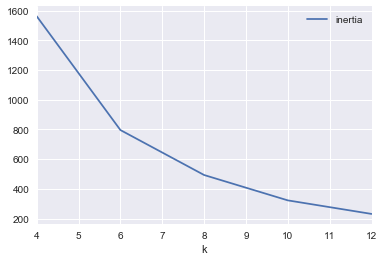

In [192]:
elbow_curve.plot(kind='line', x='k', y='inertia')


In [193]:
accepted_clustering_with_dummies.columns



Index(['loan_amnt', 'term', 'dti', 'annual_inc', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'A1', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

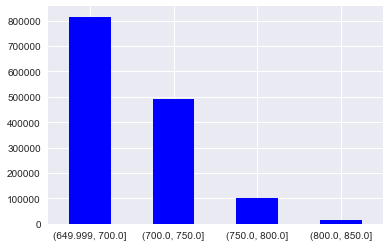

In [203]:
#manual clustering accepted_df. on basis of fico_score and purpose

out = pd.cut(accepted_df['risk_score'], bins=[650, 700, 750, 800, 850], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))



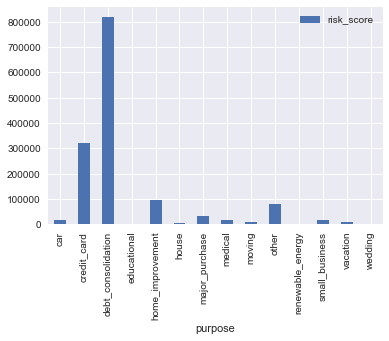

In [204]:
accepted_df.groupby(by='purpose').count().reset_index().plot(kind='bar', x='purpose', y='risk_score')